<a href="https://colab.research.google.com/github/skc02/Sabitri_INFO5502_Summer2022/blob/main/INFO_5502_Final_Exam_Summer_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INFO 5502 Final Exam (05/12/2022, 500 points in total)

<span style='background:yellow'>**Question 1 (100 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):

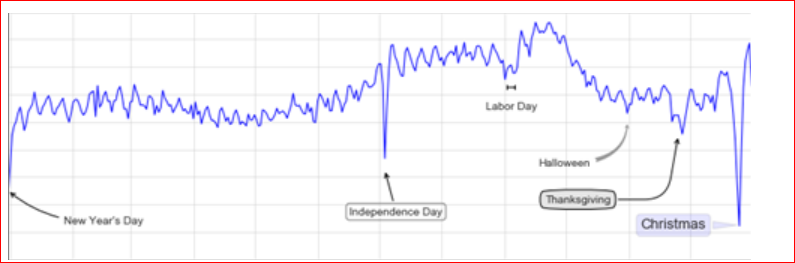



In [5]:
#### You code here
#Import all libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

import re
from nltk.util import ngrams

from sklearn.metrics.pairwise import cosine_similarity
import statistics

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns




In [39]:
final_exam = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/births.csv")
print(final_exam.head(10))


   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548
5  1969      1  3.0      M    4994
6  1969      1  4.0      F    4440
7  1969      1  4.0      M    4520
8  1969      1  5.0      F    4192
9  1969      1  5.0      M    4198


In [ ]:
df_p = np.percentile(final_exam['births'], [25, 50, 75]) 
mean, sd = df_p[1], 0.74 * (df_p[2] - df_p[0]) 
births = final_exam.query('(births > @mean - 5 * @sd) & (births < @mean + 5 * @sd)') 
births['day'] = births['day'].astype(int) 

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')  
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

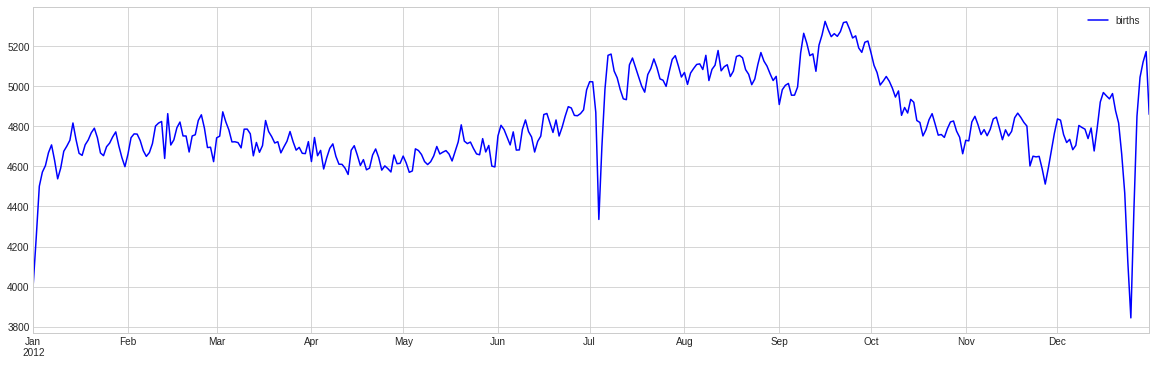

In [42]:
fig, ax = plt.subplots(figsize=(20, 6))
births_by_date.plot(ax=ax,color=['blue'])

<span style='background:yellow'>**Question 2 (100 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 

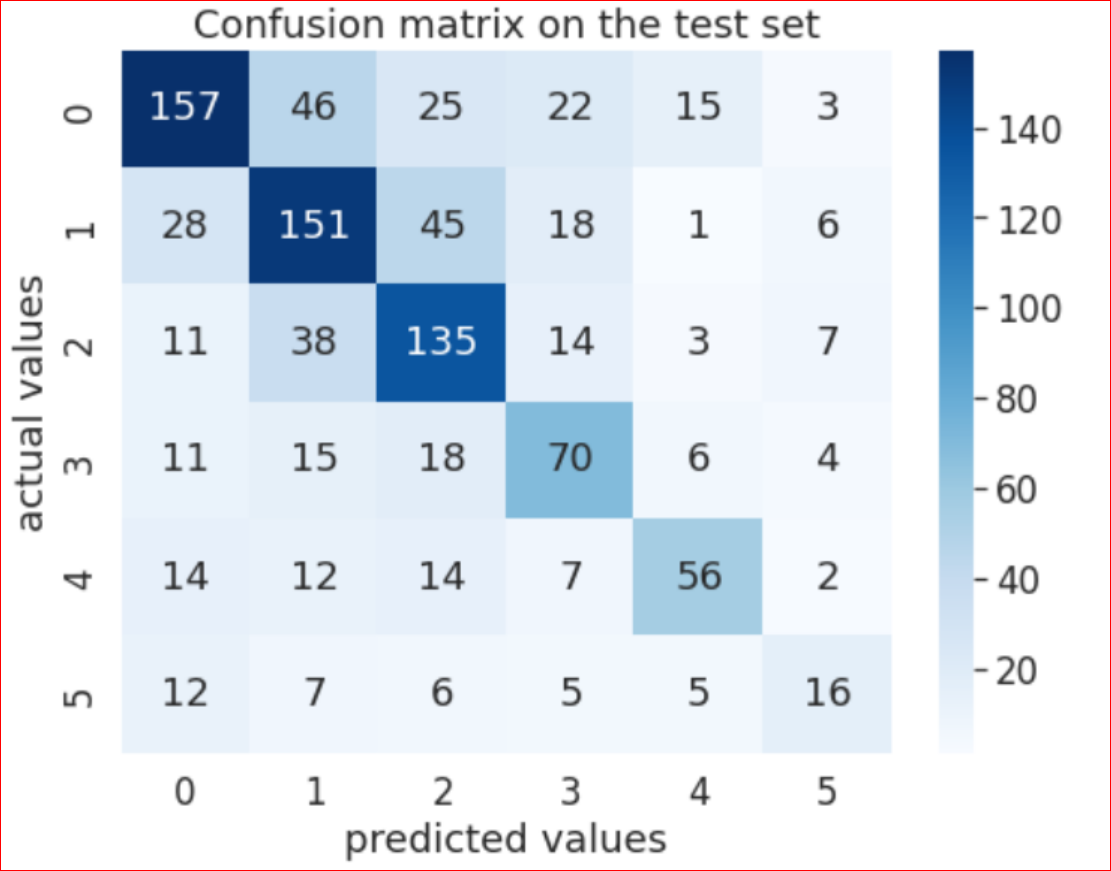

In [ ]:
#### You code here
'''Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)
Recall = (TP) / (TP+FN)
Precision = (TP) / (TP+FP)
F1 Score = (2PrecisionRecall) / (Precision + Recall)'''
c_matrix = [
                    [157,46,25,22,15,3],
                    [28,151,45,18,1,6],
                    [11,38,135,14,3,7],
                    [11,15,18,70,6,4],
                    [14,12,14,7,56,2],
                    [12,7,6,5,5,16]
                    ]

c_array = np.array(c_matrix)
c_len = len(c_array)

print("Class\t\tAccuracy\t\tPrecision\t\tRecall\t\tF1 Score")
for i in range(c_len):    
    accuracy = 0
    precision = 0
    recall = 0
    f1_score = 0
    
    TP = c_array[i,i]
    FP = c_array[i,:].sum() - TP
    FN = c_array[:,i].sum() - TP
    TN = c_array.sum().sum() - (TP+FP+FN)
    
    accuracy = (TP+TN)/c_array.sum().sum()
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*precision*recall/(precision+recall)    
    print("{0}\t{1}\t{2}\t{3}\t{4}".format(f'{i}',f'{accuracy}',f'{precision}',f'{recall}',f'{f1_score}'))    

Class		Accuracy		Precision		Recall		F1 Score
0	0.8139303482587065	0.585820895522388	0.6738197424892703	0.626746506986028
1	0.7850746268656716	0.606425702811245	0.5613382899628253	0.583011583011583
2	0.8199004975124378	0.6490384615384616	0.5555555555555556	0.598669623059867
3	0.8805970149253731	0.5645161290322581	0.5147058823529411	0.5384615384615384
4	0.9213930348258706	0.5333333333333333	0.6511627906976745	0.5863874345549738
5	0.9432835820895522	0.3137254901960784	0.42105263157894735	0.3595505617977528


<span style='background:yellow'>**Question 3 (200 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1)(30 points) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2)(30 points) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3)(30 points) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4)(30 points) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5)(30 points) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in both training and testing data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.


(6)(50 points) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?


In [26]:
#### You code here
#1)(30 points) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string.
#"https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4"
inetd_normal_url = "https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int"
inetd_intrusion_url = "https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int"
inetd_normal = pd.read_csv(inetd_normal_url,sep = ' ', header=None)
inetd_intrusion = pd.read_csv(inetd_intrusion_url,sep = ' ', header=None)

In [27]:
print(inetd_normal.any().isna())
print(inetd_intrusion.any().isna())
print(inetd_normal[inetd_normal.duplicated()])
print(inetd_intrusion[inetd_intrusion.duplicated()])


0    False
1    False
dtype: bool
0    False
1    False
dtype: bool
        0    1
2     167  125
5     167   90
7     167    5
9     167   90
10    167   90
..    ...  ...
535  2669    6
536  2669    6
537  2669    6
538  2669    6
539  2669    6

[489 rows x 2 columns]
         0    1
2      167  125
5      167   90
7      167    5
9      167   90
10     167   90
...    ...  ...
8365  4470    6
8366  4470    6
8367  4470    6
8368  4470    6
8369  4470    6

[8018 rows x 2 columns]


There are no missing values but there are duplicates present in both datasets.

In [28]:
inetd_intrusion.columns = ['PID', 'SystemCalls']
inetd_normal.columns = ['PID', 'SystemCalls']

In [35]:

intrude_dict = {}
norm_dict = {}

# combining the system calls for the two datasets
for pid in list(set(inetd_intrusion['PID'].values)):
    intrude_dict[pid] = " ".join(str(value) for value in list(inetd_intrusion[inetd_intrusion['PID'] == pid]['SystemCalls'].values))

for pid in list(set(inetd_normal['PID'].values)):
    norm_dict[pid] = " ".join(str(value) for value in list(inetd_normal[inetd_normal['PID'] == pid]['SystemCalls'].values))



In [38]:
intrude_list = []
norm_list = []

# generating ngrams with sequence length of 25

for key_token in intrude_dict.keys():
    s = intrude_dict[key_token]
    token_word = [token for token in s.split(" ") if token != ""]
    
    for ele in list(ngrams(token_word, 25)):
        intrude_list.append(ele)
        
for key_token in norm_dict.keys():
    s = norm_dict[key_token]
    token_word = [token for token in s.split(" ") if token != ""]
    
    for ele in list(ngrams(token_word, 25)):
        norm_list.append(ele)

In [42]:

print(len(intrude_list))
print(len(norm_list))

7627
469


In [43]:
#3)

intrude_data = pd.DataFrame(intrude_list)
norm_data = pd.DataFrame(norm_list)


intrude_data['class'] = 1
norm_data['class'] = 0

In [45]:
print(intrude_data.shape)
print(norm_data.shape)
combined_frames = pd.DataFrame()
combined_frames = combined_frames.append(intrude_data)
combined_frames = combined_frames.append(norm_data)
print(combined_frames.shape)

(7627, 26)
(469, 26)
(8096, 26)


In [47]:
combined_frames = combined_frames.drop_duplicates(subset = combined_frames.columns[:-1], keep = 'last')
combined_frames.shape
combined_frames['class'].value_counts()
combined_frames.columns[:-1]


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24],
      dtype='object')

In [49]:
X_frame = combined_frames.drop("class", axis = 1)
y_frame = combined_frames['class']
X_train, X_valid, y_train, y_valid = train_test_split(X_frame, y_frame, test_size = 0.2, random_state = 0)

dtreeclassifier = DecisionTreeClassifier(max_depth = 10)
dtreeclassifier.fit(X_train, y_train)
y_pred = dtreeclassifier.predict(X_valid)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        22
           1       0.93      0.87      0.90        45

    accuracy                           0.87        67
   macro avg       0.84      0.87      0.85        67
weighted avg       0.87      0.87      0.87        67



<span style='background:yellow'>**Question 4 (100 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1)(50 points) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2)(50 points) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?

In [45]:
#### You code and your answer here here
software_reviews = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/Software_Reviews_csv_files_S.csv")
software_reviews.head()

,Unnamed: 0,Unnamed: 0.1,id,status,global_review_id,hash_global_review_id,listing_id,title,is_rating,score,...,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
0,0.0,0,13879,Published,GetApp___14383,f7535d1342,90666,The best CRM solution we've found,FALSE,4.462893,...,TRUE,Marcus B.,Information Technology and Services,NaN,1-2 years,GetApp,NaN,0.993886769,0.994333982,1.850533e+04
1,1.0,1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,Reasonable CRM software for small businesses,FALSE,4.462893,...,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743,1.711777e+06
2,2.0,2,841881,Published,Capterra___330384,0d580775b7,90666,"Security certificate warning, basic lists inac...",FALSE,4.462893,...,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145,1.122507e+06
3,3.0,3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,1CRM is a great started CRM for a Service Company,FALSE,4.462893,...,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214,1.413648e+06
4,4.0,4,13939,Published,GetApp___14453,efc7312240,90666,Excellent business management app for the SMB ...,FALSE,4.462893,...,TRUE,Jacques G.,Telecommunications,NaN,1-2 years,GetApp,NaN,0.985312879,0.996334434,1.858400e+04


In [47]:
a_group = software_reviews[(software_reviews['incentivized'] == "NominalGift") | (software_reviews['incentivized'] == "VendorReferredIncentivized")]['OverAllRating']
b_group = software_reviews[(software_reviews['incentivized'] == "NoIncentive") | (software_reviews['incentivized'] == "NonNominalGift")
         | (software_reviews['incentivized'] == "VendorReferred")]['OverAllRating']

N_con = a_group.shape[0]
N_exp = b_group.shape[0]

alpha = 0.05

# Lets find the mean and variance of control and experimental groups

mean_con = np.mean(a_group)
mean_exp = np.mean(b_group)

group_first = a_group.astype('int')
group_second = b_group.astype('int')

variance_con = np.var(group_first)
variance_exp = np.var(group_second)

pooled_variance = np.sqrt(variance_con/N_con + variance_exp/N_exp)

T = (mean_con-mean_exp)/np.sqrt(variance_con/N_con + variance_exp/N_exp)

p_value = norm.sf(T)*2

Z_critical  = norm.ppf(1-alpha/2)

m = Z_critical*pooled_variance

CI = [(mean_con - mean_exp) - m, (mean_con - mean_exp) + m]

print("Test Statistics stat: ", T)
print("Z-critical: ", Z_critical)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

Test Statistics stat:  nan
Z-critical:  1.959963984540054
P_value:  nan
Confidence Interval of 2 sample Z-test for proportions:  [nan nan]


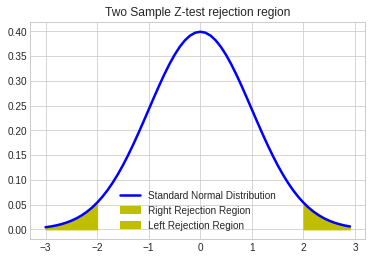

In [50]:
# 3)
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'blue',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()  